In [29]:
dataset = []

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import time

from gym_pusht.envs import PushTEnv
import gymnasium as gym
import gym_pusht
import numpy as np

env = PushTEnv(obs_type="pixels", render_mode="human", goal_pose="random")
teleop = env.teleop_agent()

obs, info = env.reset()

print(env.get_goal_pose())
done = False

while True:
    time.sleep(0.1)
    action = teleop.act(obs)

    if action is not None:
        next_obs, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        dataset.append((obs, action, reward, done, next_obs))
        obs = next_obs


        if done:
            obs, info = env.reset()  # start a new episode
            done = False

    # Optional: render the environment at each iteration
    env.render()


[227.61855048 169.95058664   2.74069148]


KeyboardInterrupt: 

In [13]:
env.close()

In [32]:
img = dataset[-2][0]

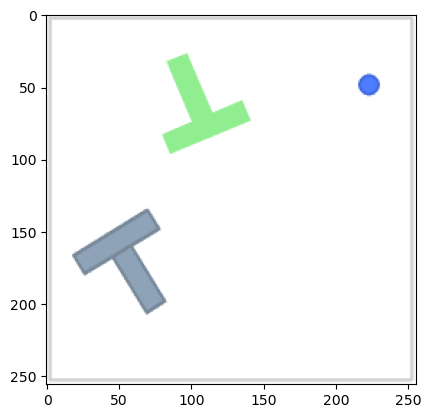

In [34]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
import pickle
import numpy as np

# ----- Сохранение -----
with open("demonstrations.pkl", "wb") as f:
    pickle.dump(dataset, f, protocol=pickle.HIGHEST_PROTOCOL)